In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import keras
import time
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from sklearn import preprocessing
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import classification_report
import pandas as pd
import itertools
%matplotlib inline


Using TensorFlow backend.


In [2]:
pwd

'/home/cps/Documents/keras'

In [3]:
# Directory with grenade pictures
grenade_dir = os.path.join('/home/cps/Desktop/keras/data/train/Grenade')

# Directory with Machine guns pictures
machineGun_dir = os.path.join('/home/cps/Desktop/keras/data/train/Machine Guns')

# Directory with Masked face pictures
mask_dir = os.path.join('/home/cps/Documents/keras/data/train/Masked Face')

# Directory with Pistol pictures
pistol_dir = os.path.join('/home/cps/Documents/keras/data/train/Pistol')

# Directory with RPG pictures
rpg_dir = os.path.join('/home/cps/Documents/keras/data/train/RPG')

# Directory with Motorcycle pictures
motorcycle_dir = os.path.join('/home/cps/Documents/keras/data/train/Motorcycle')

# Directory with Cars pictures
car_dir = os.path.join('/home/cps/Documents/keras/data/train/Car')

# Directory with Knives pictures
knife_dir = os.path.join('/home/cps/Documents/keras/data/train/Knife')

# Directory with Bat pictures
bat_dir = os.path.join('/home/cps/Documents/keras/data/train/Bat')

# Directory with Trucks pictures
#truck_dir = os.path.join('/home/mathins/Desktop/keras/data/train/Truck')

batch_size = 150 

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/home/cps/Documents/keras/data/test',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = ['Grenade','Machine Guns','Masked Face','Pistol','RPG','Motorcycle','Car','Knife','Bat'],
        class_mode='categorical')

train_generator = train_datagen.flow_from_directory(
        '/home/cps/Documents/keras/data/train',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = ['Grenade','Machine Guns','Masked Face','Pistol','RPG','Motorcycle','Car','Knife','Bat'],
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/cps/Documents/keras/data/validation',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = ['Grenade','Machine Guns','Masked Face','Pistol','RPG','Motorcycle','Car','Knife','Bat'],
        class_mode='categorical')

Found 1592 images belonging to 9 classes.
Found 5998 images belonging to 9 classes.
Found 1822 images belonging to 9 classes.


In [5]:
total_sample = train_generator.n

In [6]:
print(total_sample)

5998


In [7]:
from keras import layers, models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(layers.Dropout(0.20))


model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.20))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(9, activation='softmax'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 99, 99, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
________________________________________________

In [8]:
lr=0.0001
opt = keras.optimizers.adam(lr=lr, decay=1e-6)

In [9]:
callback = [keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', patience=10),
             keras.callbacks.callbacks.ModelCheckpoint(filepath='/home/cps/Documents/keras/best_model20.h5', monitor='val_loss', save_best_only=True)]

In [10]:
from keras.optimizers import adam
model.compile(loss='categorical_crossentropy',
               optimizer= opt,
               metrics=['acc'])

In [11]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),  
        callbacks = callback,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=int(total_sample/batch_size),
        verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 9/39 [=====>........................] - ETA: 2:44 - loss: 2.2983 - acc: 0.4770

/home/cps/.local/lib/python3.6/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/39 [==============================] - 247s 6s/step - loss: 1.4666 - acc: 0.5970 - val_loss: 8.8314 - val_acc: 0.1773
Epoch 2/30
39/39 [==============================] - 247s 6s/step - loss: 0.9007 - acc: 0.7146 - val_loss: 8.7275 - val_acc: 0.1833
Epoch 3/30
39/39 [==============================] - 247s 6s/step - loss: 0.7620 - acc: 0.7611 - val_loss: 5.6829 - val_acc: 0.2212
Epoch 4/30
39/39 [==============================] - 248s 6s/step - loss: 0.6525 - acc: 0.7864 - val_loss: 3.1109 - val_acc: 0.2349
Epoch 5/30
39/39 [==============================] - 248s 6s/step - loss: 0.5384 - acc: 0.8172 - val_loss: 4.4876 - val_acc: 0.2025
Epoch 6/30
39/39 [==============================] - 248s 6s/step - loss: 0.4745 - acc: 0.8372 - val_loss: 2.6495 - val_acc: 0.3458
Epoch 7/30
39/39 [==============================] - 248s 6s/step - loss: 0.4723 - acc: 0.8429 - val_loss: 3.5850 - val_acc: 0.2898
Epoch 8/30
39/39 [==============================] - 248s 6s/step - loss: 0.3983 - acc: 0.8676 

In [12]:
pwd

'/home/cps/Documents/keras'

In [13]:
model.save('/home/cps/Documents/keras/cps_march20.h5', include_optimizer=False)

In [116]:

n_epochs = 30

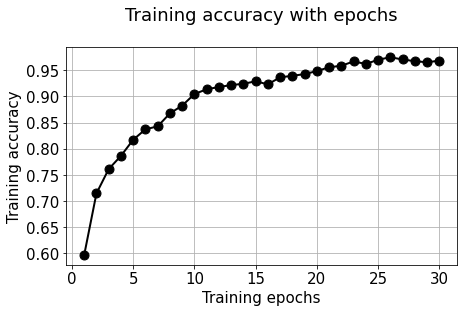

In [117]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

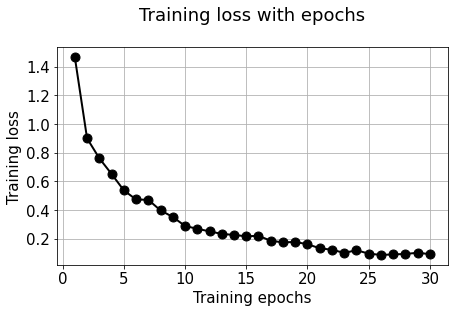

In [118]:

plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

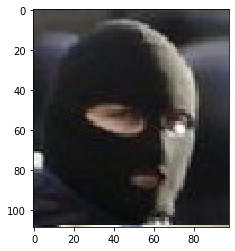

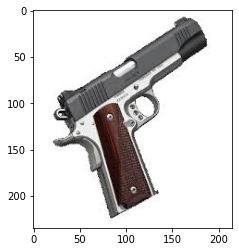

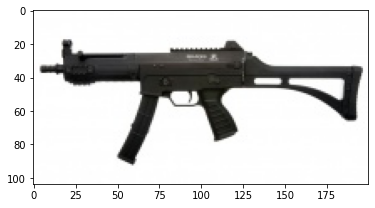

In [119]:
img_path = '/home/cps/Desktop/TF_model/data/19f.jpg'
img_mask = mpimg.imread(img_path)
plt.imshow(img_mask)
plt.show()

img_path = '/home/cps/Desktop/TF_model/data/110p.jpg'
img_pistol = mpimg.imread(img_path)
plt.imshow(img_pistol)
plt.show()

img_path = '/home/cps/Desktop/TF_model/data/98.jpg'
img_mg = mpimg.imread(img_path)
plt.imshow(img_mg)
plt.show()

In [120]:
from PIL import Image

img_mask = Image.open('/home/cps/Desktop/TF_model/data/19f.jpg')
img_pistol = Image.open('/home/cps/Desktop/TF_model/data/110p.jpg')
img_mg = Image.open('/home/cps/Desktop/TF_model/data/98.jpg')

In [121]:
img_mask = img_mask.resize((200,200))
img_pistol = img_pistol.resize((200,200))
img_mg = img_mg.resize((200,200))

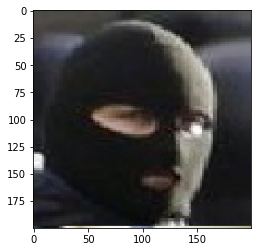

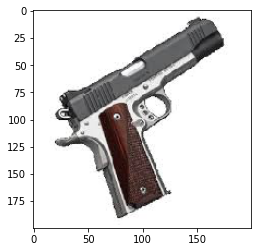

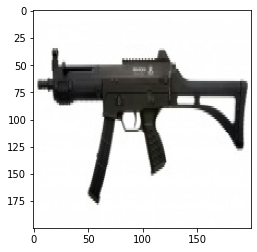

In [122]:

plt.imshow(img_mask)
plt.show()

plt.imshow(img_pistol)
plt.show()

plt.imshow(img_mg)
plt.show()

In [123]:

# Expand dimensions for proper prediction
import numpy as np
img_masks=np.expand_dims(img_mask,axis=0)
img_pistol=np.expand_dims(img_pistol,axis=0)
img_mg=np.expand_dims(img_mg,axis=0)

In [124]:
img_masks.shape

(1, 200, 200, 3)

In [125]:
img_masks.T.shape

(3, 200, 200, 1)

In [126]:
img_pistol.T.shape

(3, 200, 200, 1)

In [127]:
type(img_mask)

PIL.Image.Image

In [128]:
model.predict(img_masks)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 7.0881627e-25, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [129]:
model.predict(img_pistol)[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [130]:
model.predict(img_mg)[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [131]:
train_generator.class_indices

{'Grenade': 0,
 'Machine Guns': 1,
 'Masked Face': 2,
 'Pistol': 3,
 'RPG': 4,
 'Motorcycle': 5,
 'Car': 6,
 'Knife': 7,
 'Bat': 8}

### Solution --(Evaluation)

In [132]:
# from keras import layers, models
# keras.backend.clear_session()
# model = models.Sequential()
# model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)))
# model.add(layers.Dropout(0.20))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(32, (3,3), activation='relu'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))
# model.summary()

In [217]:
# Load weights from pretrained model
#model.load_weights('/home/cps/Documents/keras/best_model20.h5')
#print("Loaded model from disk")

In [218]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 150 
test_generator = test_datagen.flow_from_directory(
        '/home/cps/Documents/keras/data/test',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = ['Grenade','Machine Guns','Masked Face','Pistol','RPG','Motorcycle','Car','Knife','Bat'],
        class_mode='categorical',
        shuffle = False)

Found 1601 images belonging to 9 classes.


In [219]:
tic = time.time()
results = model.predict_generator(test_generator,steps=np.ceil(test_generator.n/batch_size))
toc = time.time()

/home/cps/.local/lib/python3.6/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [220]:
print("Time consumed for prediction on test dataset is",toc-tic,"seconds")

Time consumed for prediction on test dataset is 13.679277658462524 seconds


In [221]:
confidence_score = np.max(results,axis=1)
print("Cofidence socre image wise is as follows",confidence_score*100,"percentage")

Cofidence socre image wise is as follows [99.99822  87.571045 63.71289  ... 96.415924 98.096016 99.7531  ] percentage


In [222]:
print("Average of all confidence score is",np.average(confidence_score*100),"percentage")

Average of all confidence score is 94.33249 percentage


In [223]:
class_dict = test_generator.class_indices
def get_key(val): 
    for key, value in class_dict.items(): 
         if val == value: 
             return key

In [224]:
pred_label = np.argsort(-results,axis=1)[:,0]

In [225]:
pred_class = []
for i in pred_label:
    pred_class.append(get_key(i))
print("Class labels are predicted as",pred_class)

Class labels are predicted as ['Grenade', 'Grenade', 'Pistol', 'Grenade', 'Masked Face', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Pistol', 'Masked Face', 'Grenade', 'Masked Face', 'Grenade', 'Masked Face', 'Grenade', 'Grenade', 'Car', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Knife', 'Grenade', 'Grenade', 'Masked Face', 'Grenade', 'Knife', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Pistol', 'Grenade', 'Masked Face', 'Grenade', 'Grenade', 'Grenade', 'Knife', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Knife', 'Pistol', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'RPG', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Knife', 'Pistol', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Grenade', 'Pistol', 'Grenade', 'Knife', 'Grenade', 'Grenade', 'Grenade', 'Car', 'Car', 

In [226]:
acc_sc = accuracy_score(test_generator.classes,pred_label)
print("Ovarall accuracy on test dataset is",acc_sc*100,"percentage")

Ovarall accuracy on test dataset is 90.56839475327921 percentage


In [227]:
print("confusion matrix:")
conf_mat = confusion_matrix(test_generator.classes,pred_label)
print(conf_mat)

confusion matrix:
[[118   0   8   6   2   0   7  10   0]
 [  1 124   0   8  13   0   2   8   0]
 [  1   0  92   1   2   0   4   0   0]
 [  1   0   3 342   5   0   8  10   1]
 [  3   0   0   0 101   0   0   0   0]
 [  0   0   0   0   0 217  22   1   0]
 [  1   0   2   2   1   2 332   0   1]
 [  1   0   1   0   0   0   2  93   0]
 [  0   0   0   0   5   0   1   5  31]]


In [228]:
print("Overall precision score",precision_score(test_generator.classes,pred_label,average='macro'))
print("Overall recall score",recall_score(test_generator.classes,pred_label,average='macro'))

Overall precision score 0.8978751447749637
Overall recall score 0.8851598609417066


In [229]:
print(classification_report(test_generator.classes,pred_label,target_names = test_generator.class_indices.keys()))

              precision    recall  f1-score   support

     Grenade       0.94      0.78      0.85       151
Machine Guns       1.00      0.79      0.89       156
 Masked Face       0.87      0.92      0.89       100
      Pistol       0.95      0.92      0.94       370
         RPG       0.78      0.97      0.87       104
  Motorcycle       0.99      0.90      0.95       240
         Car       0.88      0.97      0.92       341
       Knife       0.73      0.96      0.83        97
         Bat       0.94      0.74      0.83        42

    accuracy                           0.91      1601
   macro avg       0.90      0.89      0.88      1601
weighted avg       0.92      0.91      0.91      1601



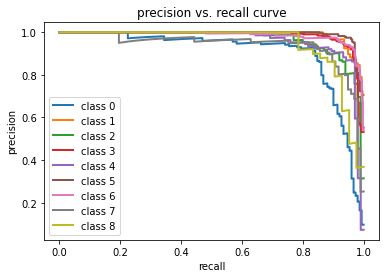

In [230]:
lb = preprocessing.LabelBinarizer()
lb.fit(np.unique(test_generator.classes))
bin_true_class = lb.transform(test_generator.classes)

precision = dict()
recall = dict()
samp = [0,1,2,3,4]
for i in range(np.unique(test_generator.classes).shape[0]):
    precision[i], recall[i], _ = precision_recall_curve(bin_true_class[:,i],
                                                        results[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

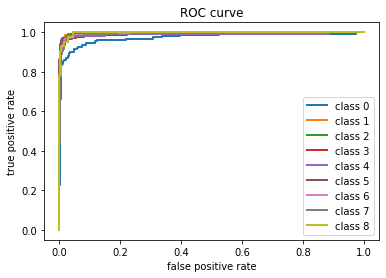

In [231]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(np.unique(test_generator.classes).shape[0]):
    fpr[i], tpr[i], _ = roc_curve(bin_true_class[:, i],
                                  results[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [232]:
# Saving results to csv file
fnames = test_generator.filenames
df = pd.DataFrame(fnames,columns=['Filename'])
df['Confidence_Score'] = confidence_score*100
df['Class_Label'] = pred_class
df.to_csv('/home/cps/Documents/results20a.csv')

Predicted label is Masked Face with confidence score 99.80753660202026 percentage


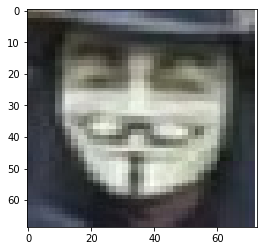

Predicted label is Pistol with confidence score 94.41923499107361 percentage


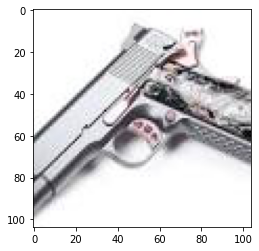

Predicted label is RPG with confidence score 58.53421688079834 percentage


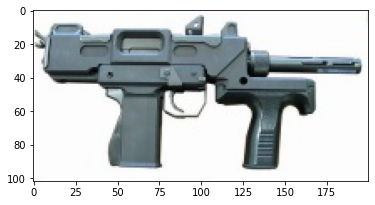

In [233]:
# Extra --> Model prediction on some random test images along with plots
from PIL import Image

img_mask=Image.open('/home/cps/Desktop/keras/data/test/Masked Face/11.jpg')
img_pistol=Image.open('/home/cps/Desktop/keras/data/test/Pistol/192.jpeg')
img_mg=Image.open('/home/cps/Desktop/keras/data/test/Machine Guns/124.jpg')

pred_mask = model.predict(np.expand_dims(img_mask.resize((200,200)),axis=0)/255)
pred_pistol = model.predict(np.expand_dims(img_pistol.resize((200,200)),axis=0)/255)
pred_mg = model.predict(np.expand_dims(img_mg.resize((200,200)),axis=0)/255)

print("Predicted label is",get_key(np.argmax(pred_mask)),"with confidence score",np.max(pred_mask)*100,"percentage" )
plt.imshow(img_mask)
plt.show()
print("Predicted label is",get_key(np.argmax(pred_pistol)),"with confidence score",np.max(pred_pistol)*100,"percentage" )
plt.imshow(img_pistol)
plt.show()
print("Predicted label is",get_key(np.argmax(pred_mg)),"with confidence score",np.max(pred_mg)*100,"percentage" )
plt.imshow(img_mg)
plt.show()